In [20]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
# add categorical module for multiclass cross entropy
from keras.utils.np_utils import to_categorical


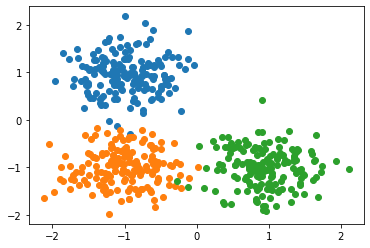

In [21]:
# numbers of points
n_pts = 500
# coordinators of center of blob cluster
# cluster index or positions: [0, 1, 2, 3, 4] for the output label
# centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
centers = [[-1, 1], [-1, -1], [1, -1]]

"""
 - make blobs() fun :  Generate isotropic Gaussian blobs for clustering.
 - n_samples : 
 - random_state : 
 - centers : center coordinators position
 - cluster_std : distance between points clustered 
"""
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)
# print(X)
# print(y) 

# plot the dataset cluster of the 3 classes
# plot the data of coordinator index [0] i.e : [-1, 1]
plt.scatter(X[y==0, 0], X[y==0, 1])
# plot the data of coordinator index [1] i.e : [-1, -1]
plt.scatter(X[y==1, 0], X[y==1, 1])
# plot the data of coordinator index [2] i.e : [1, -1]
plt.scatter(X[y==2, 0], X[y==2, 1])
# plot the data of coordinator index [3] i.e : [1, 1]
# plt.scatter(X[y==3, 0], X[y==3, 1])
# plot the data of coordinator index [4] i.e : [0, 0]
# plt.scatter(X[y==4, 0], X[y==4, 1])
 

In [22]:
# printing actual labels
print(y)
# reformate the label into hot encoding form
"""
to_categorical(y, arg2)
 - y : actual label
 - arg2 : if empty => 3 classes , others the number of specified classes 
"""
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [23]:
# create NN model
model = Sequential()
# create the layers with 'softmax' for multiclass classfication
# model.add(Dense(5, input_shape=(2,), activation='softmax'))
# height of the layer : 3 (2 inputs values + 1 bias)  
model.add(Dense(3, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
# training the labels with hot coding processes
# one hot encode output
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.9412 - accuracy: 0.6378
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.9814
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9902
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9886
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9933
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9846
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9893
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9897
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9913
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9861
Epoch 11/

In [25]:
# ploting decision boundaries 
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is:  [1]


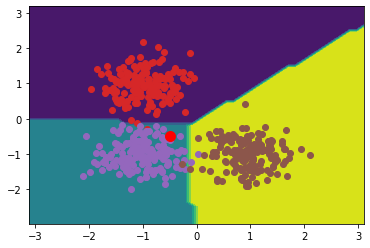

In [26]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
# plt.scatter(X[y==3, 0], X[y==3, 1])
# plt.scatter(X[y==4, 0], X[y==4, 1])

# adding twice for new point classification
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
# plt.scatter(X[y==3, 0], X[y==3, 1])
# plt.scatter(X[y==4, 0], X[y==4, 1])
 
x = -0.5
y = -0.5

# adding twice for new point classification
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)

# 0 : violet zone
# 1 : blue
# 2 : yellow

# So model is working great!!!